In [63]:
from os.path import join as pjoin
import json
import os
import imageio
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
import sklearn
from sklearn.feature_extraction import image
from sklearn.datasets import load_sample_image
import scipy.misc

In [65]:
#https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
a = np.squeeze(seismic_canada)[1:20000]
b= np.squeeze(seismic_nl)[1:20000]
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
print(var_a)
print(var_b)
#std deviation
s = np.sqrt((var_a + var_b)/2)
print(s)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/20000))



## Compare with the critical t-value
#Degrees of freedom
df = 2*20000 - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))


0.4138856290572834
0.0466302580644298
0.4798520017264246
t = -2.268352553417471
p = 1.9766869663747362
t = -2.268295843894758
p = 0.023316488116434


### Canada Data class 2

In [5]:
labels = np.load('data_canada/train/labels.npy')
result = np.where(labels==2)
print('Tuple of arrays returned : ', result)
seismic = np.load('data_canada/train/images.npy')
seismic_canada = seismic[result]
print(seismic_canada)

Tuple of arrays returned :  (array([    0,     0,     0, ..., 15216, 15216, 15216], dtype=int64), array([ 0,  0,  0, ..., 39, 39, 39], dtype=int64), array([ 0,  1,  2, ..., 37, 38, 39], dtype=int64))
[ 0.70196078  1.          0.65490196 ... -0.4745098  -0.37254902
 -0.24705882]


### Netherlands Data class 2

In [46]:
labels = np.load('data_netherlands/train/train_labels.npy')
result = np.where(labels==2)
print('Tuple of arrays returned : ', result)
seismic_netherlands = np.load('data_netherlands/train/train_seismic.npy')
seismic_nl = seismic_netherlands[result]
print(seismic_nl)


Tuple of arrays returned :  (array([  0,   0,   0, ..., 400, 400, 400], dtype=int64), array([  0,   0,   0, ..., 700, 700, 700], dtype=int64), array([ 76,  77,  78, ..., 252, 253, 254], dtype=int64))
[-0.34047574 -0.15254456  0.06938825 ... -0.08590122 -0.07811896
 -0.07811896]


In [49]:
#plt.imsave('output.jpg', seismic[:,1,:])
one_image = load_sample_image("china.jpg")
#print(one_image.shape)
#one_image = load_sample_image("output.jpg")
patches = image.extract_patches_2d(seismic[:,1,:], (40, 40))
print(patches.shape)
plt.imsave('output.jpg', patches[0])

(78192, 40, 40)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Netherlands Class 2')]

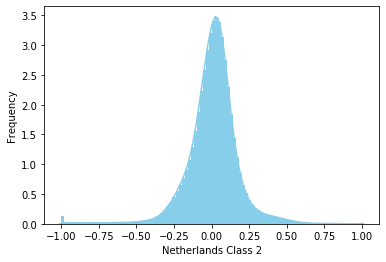

In [14]:
ax = sns.distplot(seismic_nl,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Netherlands Class 2', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Netherlands')]

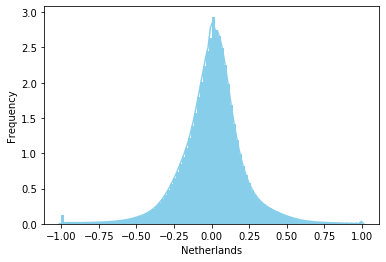

In [47]:
ax = sns.distplot(seismic_netherlands,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Netherlands', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Canada Class2')]

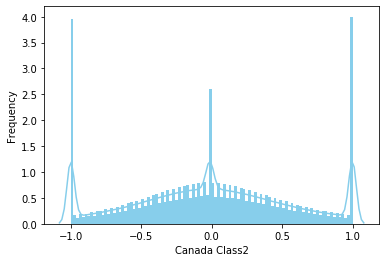

In [12]:
ax = sns.distplot(seismic_canada,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Canada Class2', ylabel='Frequency')

In [17]:
labels = np.load('data_netherlands/train/train_labels.npy')
result = np.where(labels==3)
print('Tuple of arrays returned : ', result)
seismic = np.load('data_netherlands/train/train_seismic.npy')
seismic_nl1 = seismic[result]
print(seismic_nl1)

Tuple of arrays returned :  (array([  0,   0,   0, ..., 400, 400, 400], dtype=int64), array([  0,   0,   0, ..., 599, 600, 600], dtype=int64), array([194, 195, 196, ..., 254, 253, 254], dtype=int64))
[-0.51490791 -0.05716125  0.16189154 ... -0.50088077 -0.92057635
 -0.92057635]


In [18]:
labels = np.load('data_canada/train/labels.npy')
result = np.where(labels==3)
print('Tuple of arrays returned : ', result)
seismic = np.load('data_canada/train/images.npy')
seismic_canada1 = seismic[result]
print(seismic_canada1)

Tuple of arrays returned :  (array([    2,     2,     2, ..., 15219, 15219, 15219], dtype=int64), array([ 0,  0,  0, ..., 39, 39, 39], dtype=int64), array([ 0,  1,  2, ..., 37, 38, 39], dtype=int64))
[-0.12941176 -0.18431373  0.96862745 ... -0.16078431  0.49803922
  0.74117647]


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Netherlands Class 3')]

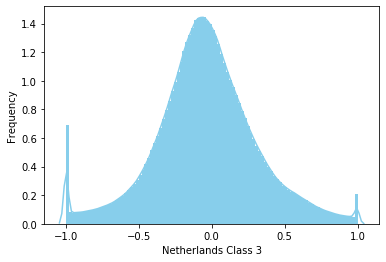

In [19]:
ax = sns.distplot(seismic_nl1,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Netherlands Class 3', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Canada Class 3')]

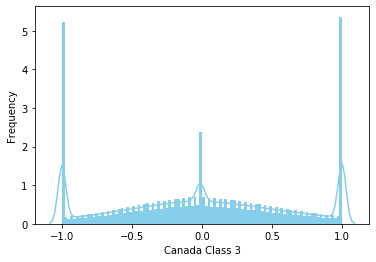

In [24]:
ax = sns.distplot(seismic_canada1,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Canada Class 3', ylabel='Frequency')

In [22]:
labels = np.load('data_canada_original/train/labels.npy')
result = np.where(labels==3)
print('Tuple of arrays returned : ', result)
seismic = np.load('data_canada_original/train/images.npy')
seismic_canada2 = seismic[result]
print(seismic_canada2)

Tuple of arrays returned :  (array([    9,     9,     9, ..., 32938, 32938, 32938], dtype=int64), array([ 0,  0,  0, ..., 39, 39, 39], dtype=int64), array([ 0,  1,  2, ..., 37, 38, 39], dtype=int64))
[ 49 183  98 ... 250 241 255]


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Canada Original Class 3')]

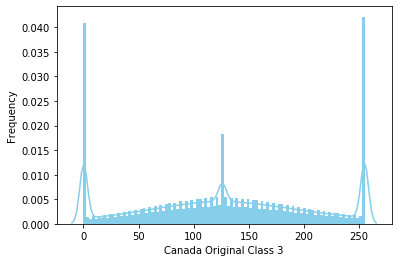

In [25]:
ax = sns.distplot(seismic_canada2,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Canada Original Class 3', ylabel='Frequency')

In [43]:
labels = np.load('data_canada/train/labels.npy')
seismic = np.load('data_canada/train/images.npy')
result = np.where(seismic>=-0.999)
seismic_canada1 = seismic[result]
result1 = np.where(seismic_canada1<=0.999)
seismic_canada5 = seismic_canada1[result1]
labels1= labels[result]
labels2 = labels1[result1]
print(seismic_canada5)
print(labels2)

[ 0.70196078  0.65490196  0.61568627 ... -0.00392157  0.01960784
 -0.04313725]
[2 2 2 ... 0 0 0]


In [44]:
lbl= np.where(labels2==2)
seismic_canada6 = seismic_canada5[lbl]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Canada Class 3')]

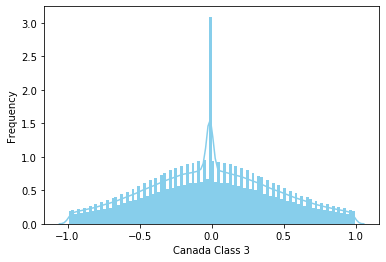

In [45]:
ax = sns.distplot(seismic_canada6,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Canada Class 3', ylabel='Frequency')

In [54]:
np.squeeze(seismic_nl1).shape

(4760778,)

In [58]:
r = np.corrcoef(np.squeeze(seismic_canada1)[1:20000], np.squeeze(seismic_nl1)[1:20000])
print(r)

[[1.         0.02038734]
 [0.02038734 1.        ]]


In [62]:
import scipy.stats as stats
r = stats.f_oneway(np.squeeze(seismic_canada1)[1:25000], np.squeeze(seismic_nl1)[1:25000])
print(r)
r = stats.mannwhitneyu(np.squeeze(seismic_canada1)[1:25000], np.squeeze(seismic_nl1)[1:25000])
print(r)

F_onewayResult(statistic=2366.7865847609105, pvalue=0.0)
MannwhitneyuResult(statistic=246536146.0, pvalue=0.0)
